# Mesure de la dispersion du faisceau

## !!! ajouter le calcul d'incertitudes sur les modèles !!!
## !!! ajouter calcul coeff r² !!!

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from scipy.optimize import curve_fit

In [14]:
def R_square(tab_y,y_reg):
    y = np.average(tab_y)

    s1 = np.sum((tab_y - y_reg)**2)
    s2 = np.sum((tab_y - y)**2)

    R2 = 1 - s1/s2

    R2 = int(100*R2)/100

    return R2

In [15]:
def gauss(x, A, B): 
	y = A*np.exp(-2*x**2/(B**2))
	return y	

def div(x,A,B):
	y = A*np.sqrt(1+(x/B)**2)
	return y

In [16]:
def get_r_v(z):
    global cur
    cur.execute(f"SELECT data.Radius, data.Voltage FROM data WHERE data.distance = {z} ORDER BY data.Radius")
    rows = cur.fetchall()
    r = np.array([row[0] for row in rows])
    v = np.array([row[1] for row in rows])
    return np.array(r),np.array(v)

In [17]:
def get_r_v_2(z):
    global cur
    cur.execute(f"SELECT data.Radius, data.Voltage FROM data WHERE data.distance = {z} AND data.radius >= {0} ORDER BY data.Radius")
    rows = cur.fetchall()
    r = np.array([row[0] for row in rows])
    v = np.array([row[1] for row in rows])
    return np.array(r),np.array(v)

In [18]:
conn = sqlite3.connect("data1.db")
cur = conn.cursor()

In [19]:
z_list = cur.execute("SELECT DISTINCT data.distance FROM data ORDER BY data.distance").fetchall()
z_list = [z[0] for z in z_list]
z_list

[1.1, 2.0, 2.1, 2.2, 3.3, 3.93, 5.2, 6.6]

1.9993100846318426 5.096017493802421
W(1.1) = 5.096017493802421
Matrice de covariance
[[ 0.08094767 -0.14797855]
 [-0.14797855  0.77074741]]


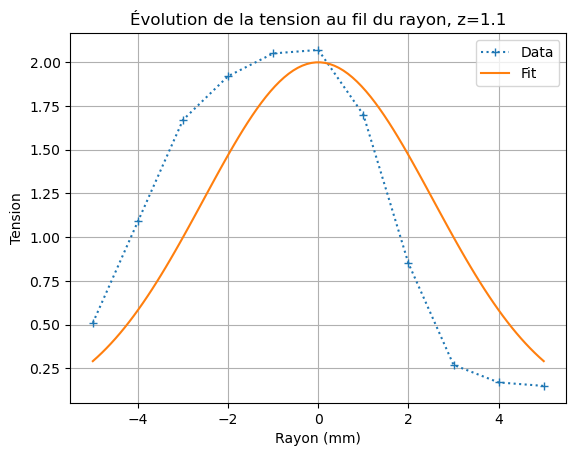

2.2470591371281454 4.924005362198738
W(2.0) = 4.924005362198738
Matrice de covariance
[[ 0.00870854 -0.01346381]
 [-0.01346381  0.05993964]]


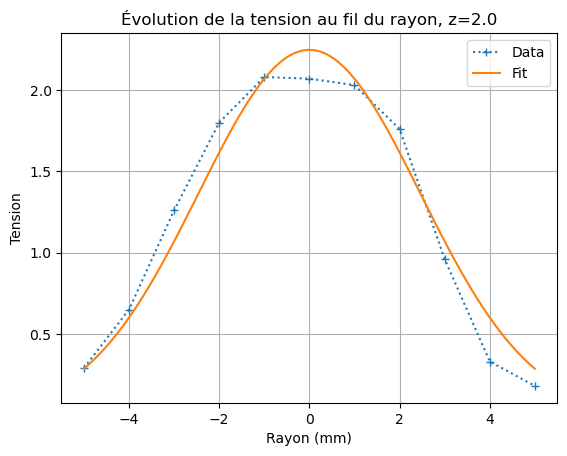

2.161212201844691 5.270565990334614
W(2.1) = 5.270565990334614
Matrice de covariance
[[ 0.02830715 -0.05045318]
 [-0.05045318  0.25323264]]


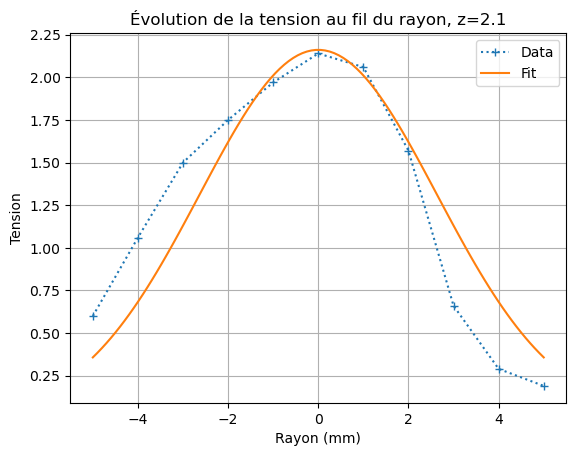

0.516476598601454 5.15239531175952
W(2.2) = 5.15239531175952
Matrice de covariance
[[ 0.00094295 -0.00794556]
 [-0.00794556  0.17432559]]


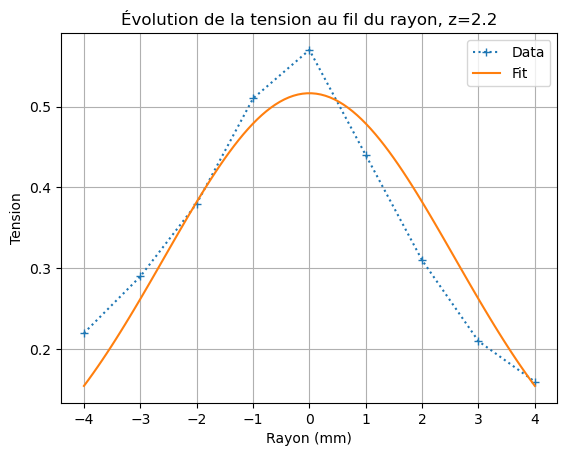

2.029660733489742 5.330328208703497
W(3.3) = 5.330328208703497
Matrice de covariance
[[ 0.04370903 -0.08447459]
 [-0.08447459  0.45783124]]


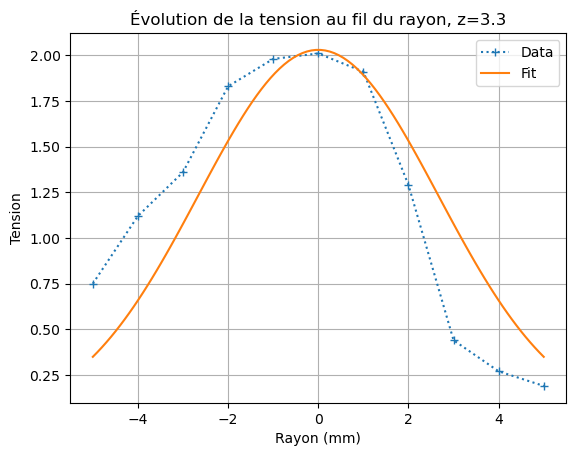

1.9596500313272638 5.332808854642153
W(3.93) = 5.332808854642153
Matrice de covariance
[[ 0.04023398 -0.0806001 ]
 [-0.0806001   0.45271401]]


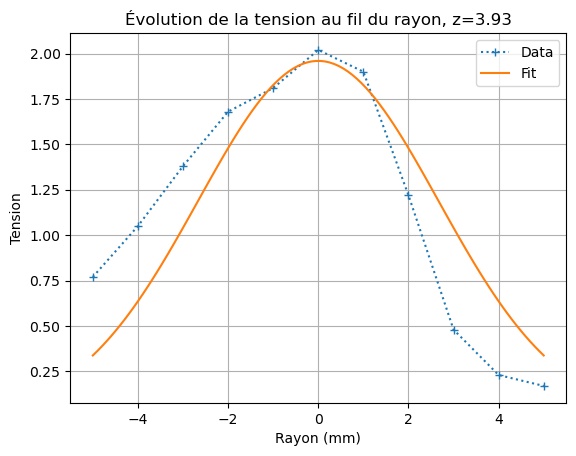

1.9181042425297696 5.568155663880182
W(5.2) = 5.568155663880182
Matrice de covariance
[[ 0.04080231 -0.08980291]
 [-0.08980291  0.5447337 ]]


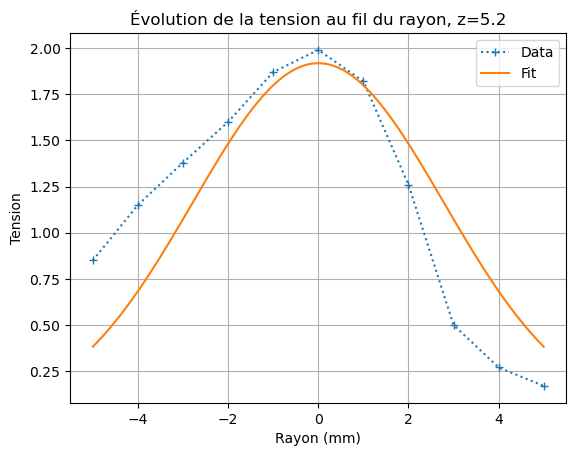

1.5091922399233217 5.815141505345029
W(6.6) = 5.815141505345029
Matrice de covariance
[[ 0.01349483 -0.04079711]
 [-0.04079711  0.33358831]]


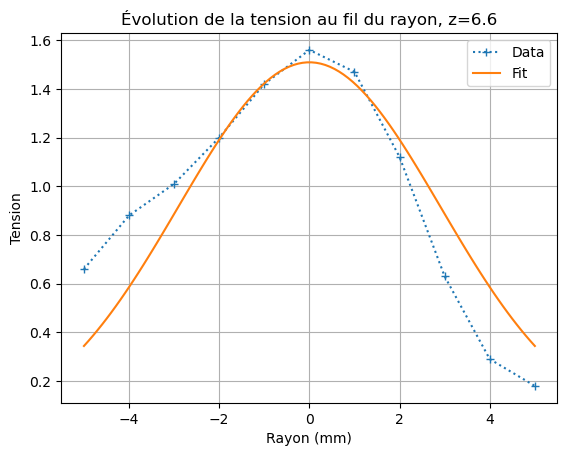

In [20]:
W_list = []

for z in z_list:
    R,V = get_r_v(z)
    parameters,covariance = curve_fit(gauss, R, V)
    fit_A = parameters[0]
    fit_B = parameters[1]

    print(fit_A, fit_B)
    print(f"W({z}) = {fit_B}")
    print("Matrice de covariance")
    print(covariance)

    W_list.append(fit_B)

    fit_r = np.linspace(min(R), max(R), 100)
    fit_v = gauss(fit_r, fit_A, fit_B)

    plt.plot(R,V, ":+", label="Data")
    plt.plot(fit_r, fit_v, "-", label="Fit") 
    plt.grid()
    plt.xlabel("Rayon (mm)")
    plt.ylabel("Tension")
    plt.title(f"Évolution de la tension au fil du rayon, z={z}")
    plt.legend()
    plt.show()

In [21]:
z_list,W_list = np.array(z_list),np.array(W_list)

In [22]:
parameters,covariance = curve_fit(div, z_list, W_list)
fit_A = parameters[0]
fit_B = parameters[1]

print("Matrice de covariance")
print(covariance)

print(f"W0 = {fit_A}, z0 = {fit_B}")

fit_z = np.linspace(min(z_list), max(z_list), 100)
fit_w = div(fit_z, fit_A, fit_B)

Matrice de covariance
[[0.00298103 0.04087457]
 [0.04087457 0.96392789]]
W0 = 5.055052516411217, z0 = 11.448484793686012


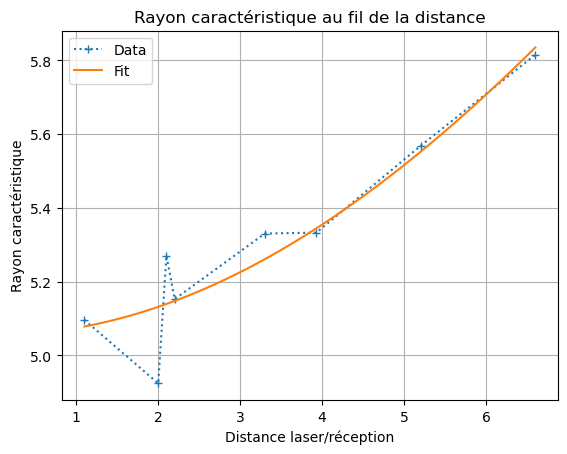

In [23]:
plt.plot(z_list, W_list, ":+", label="Data")
plt.plot(fit_z, fit_w, "-", label="Fit")
plt.xlabel("Distance laser/réception")
plt.ylabel("Rayon caractéristique")
plt.title("Rayon caractéristique au fil de la distance")
plt.legend()
plt.grid()

In [24]:
conn.close()